# Librerías necesarias

In [0]:
# !sudo pip3 install imblearn
# !sudo pip3 install xgboost
# !sudo pip3 install -U imbalanced-learn
# !pip3 install fastai==0.7.0 

In [7]:
#recarga odulos externos
#realiza los gráfico sen la misma linea
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math

In [0]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [0]:
from fastai.vision import *

In [0]:
from fastai.imports import *
#from fastai.structured import *
#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
#from sklearn import metrics 

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from pylab import rcParams

In [11]:
#Se cargan librerías para balancerar datos 
#sudo conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# con esta librería se cuentan los datos contenidos en un arreglo y presenta el resultado en un diccionario
from collections import Counter

In [0]:
#conda install -c conda-forge xgboost
import xgboost

In [0]:
#se usa para importar el DataSet desde GoogleDrive
from google.colab import drive

Crear carpeta

In [15]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Se carga el DataSet
ftc = pd.read_csv("drive/My Drive/Fraude Bancario/creditcard.csv")

In [17]:
ftc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


[0, 1000, 0, 4000]

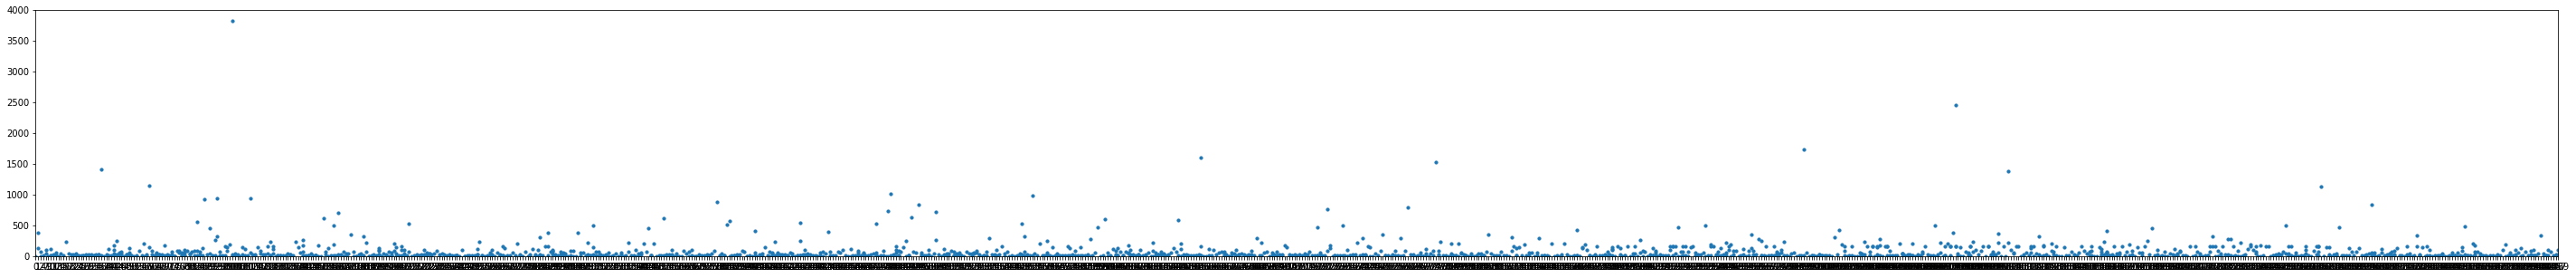

In [0]:
#plt.figure(figsize=(50,5))
#plt.scatter(ftc.Time[1:10000], ftc.Amount[1:10000], s=10)
#plt.axis([0, 1000, 0, 4000])

Text(0, 0.5, 'Number of Observations')

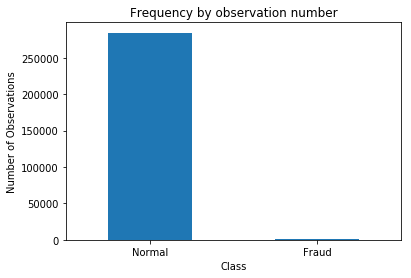

In [18]:
count_classes = pd.value_counts(ftc.Class, sort = True) # se cuentan lso valores de la columna Class y se almacenan en count_class
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), ('Normal', 'Fraud'))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [19]:
#verificamos la cantidad de datos Fraudulento y No Fraudulentos
pd.value_counts(ftc.Class, sort = True)

0    284315
1       492
Name: Class, dtype: int64

In [20]:
#porcentaje de fraudes
fraud_porcent = (492/(492+284315))*100
print(round(fraud_porcent,2),"%")

0.17 %


In [0]:
#Separamos los las variables Independientes (x) y las dependientes (y)
x = ftc.loc[:, ftc.columns!='Class']
y = ftc.loc[:, 'Class']

In [22]:
#verificamos
x.shape, y.shape, ftc.shape

((284807, 30), (284807,), (284807, 31))

In [0]:
#utilizamos el 50% de los datos para entrenar
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state = 1)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [0]:
#el 50% restante se dividirá en test(25%) y valid(25%) 
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, train_size=0.5, random_state = 1)

In [26]:
x_test.shape, x_valid.shape, y_test.shape, y_valid.shape

((71202, 30), (71202, 30), (71202,), (71202,))

# Prueba con data set desbalanceado
#####(con xgboost esta sección solo es de prueba)

In [0]:
def xgb_model(x_train, x_test, y_train, y_test):
    parameters = {'nthreads': [1],
              'objetive': ['binary:logistic'],
              'learning_rate': [0.05, 0.1],
              'nstimator': [100,200]}
    fit_params = {'early_stopping_rounds': 10,
              'eval_metric': 'logloss',
              'eval_set': [(x_test, y_test)]}
    xgb = xgboost.XGBClassifier()
    clf = GridSearchCV(xgb, parameters, scoring='accuracy', cv=3, refit=True)
    clf.fit(x_train, y_train, **fit_params)
    return clf

In [0]:
#indicadores de rendimiento
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    #acc_fraud = accuracy_score(y_test, y_pred)
    acc_fraud = roc_auc_score(y_valid, y_pred)
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )
    print("roc_accuracy:", acc_fraud)

In [29]:
pd.value_counts(y_train, sort = True)

0    142138
1       265
Name: Class, dtype: int64

In [30]:
pd.value_counts(y_test, sort = True)

0    71087
1      115
Name: Class, dtype: int64

In [31]:
ftc_xgb = xgb_model(x_train, x_test, y_train, y_test)

[0]	validation_0-logloss:0.644514
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.600505
[2]	validation_0-logloss:0.560495
[3]	validation_0-logloss:0.523968
[4]	validation_0-logloss:0.490502
[5]	validation_0-logloss:0.459746
[6]	validation_0-logloss:0.4314
[7]	validation_0-logloss:0.405207
[8]	validation_0-logloss:0.380956
[9]	validation_0-logloss:0.358455
[10]	validation_0-logloss:0.337542
[11]	validation_0-logloss:0.318074
[12]	validation_0-logloss:0.299924
[13]	validation_0-logloss:0.282972
[14]	validation_0-logloss:0.267124
[15]	validation_0-logloss:0.252296
[16]	validation_0-logloss:0.238406
[17]	validation_0-logloss:0.225361
[18]	validation_0-logloss:0.213137
[19]	validation_0-logloss:0.201656
[20]	validation_0-logloss:0.190864
[21]	validation_0-logloss:0.180702
[22]	validation_0-logloss:0.171132
[23]	validation_0-logloss:0.162124
[24]	validation_0-logloss:0.153629
[25]	validation_0-logloss:0.145624
[26]	validation_0-logloss:0.138073

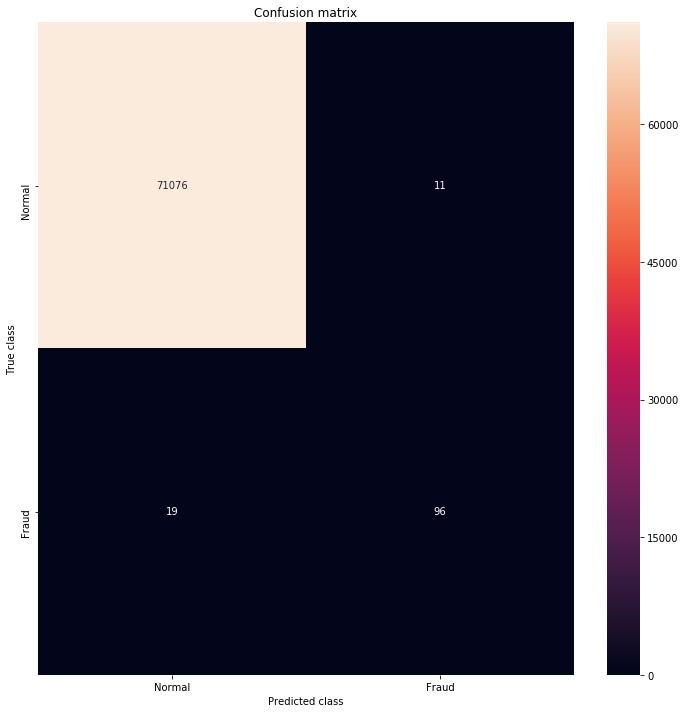

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71087
           1       0.90      0.83      0.86       115

    accuracy                           1.00     71202
   macro avg       0.95      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202



0    71087
1      115
Name: real, dtype: int64 

0    71095
1      107
Name: pred, dtype: int64 

roc_accuracy: 0.4992474328316219


In [32]:
y_pred = ftc_xgb.predict(x_test)
ftc_represent(y_test, y_pred)

# Regresión logistica con penalización

In [0]:
#con esta función tuneamos y entrenamos con el modelo de regresión logistica
def reg_logistica_model(x_train, y_train, x_test, y_test):
    #"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000] #paremetros de regularización para evitar sobreajuste
    #param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l2"]} #para metros para validación cruzada
    
    #con class_weight="balanced" el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento
    reg_logistic = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")
    
    #clf= GridSearchCV(reg_logistic, param_grid, cv=5) #se realiza una validación cruzada por cada valor de C de param_grid
   # clf.fit(x_train, y_train)
    reg_logistic.fit(x_train, y_train)
    return reg_logistic

In [0]:
#indicadores de rendimiento
#indicadores de rendimiento
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ("Regresión Logistica con Penalización")
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    #acc_fraud = accuracy_score(y_test, y_pred)
    #acc_fraud = roc_auc_score(y_valid, y_pred)
    #print("roc_accuracy:", acc_fraud)
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )

In [0]:
ftc_reglog = reg_logistica_model(x_train, y_train, x_test, y_test)

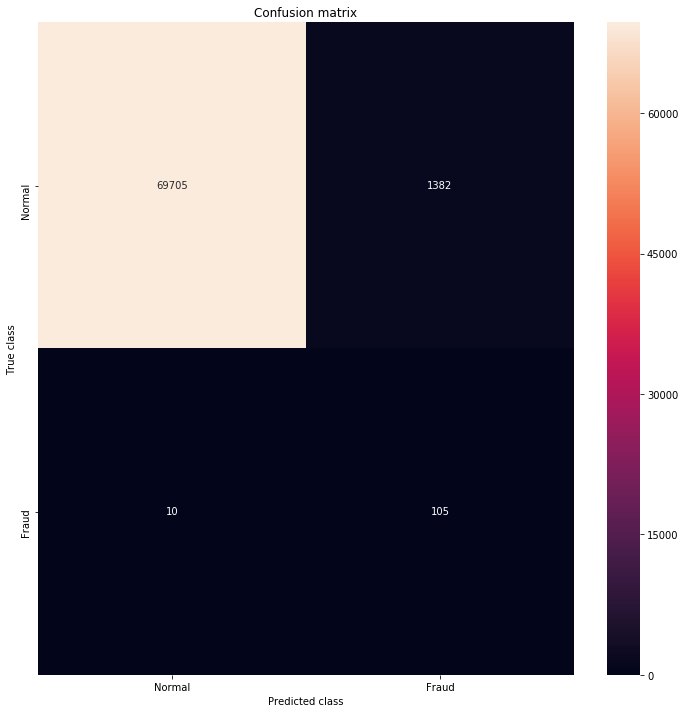

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71087
           1       0.07      0.91      0.13       115

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202



0    71087
1      115
Name: real, dtype: int64 

0    69715
1     1487
Name: pred, dtype: int64 



In [36]:
y_pred_reglog = ftc_reglog.predict(x_test)#predecimos los datos
ftc_represent(y_test, y_pred_reglog)

In [38]:
roc_auc_score(y_test, y_pred_reglog)

0.9468012557790485

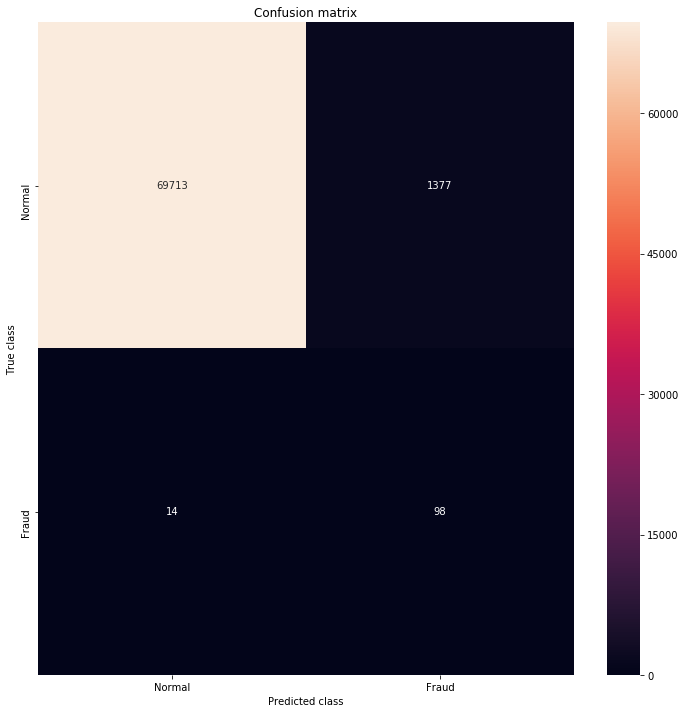

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71090
           1       0.07      0.88      0.12       112

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



0    71090
1      112
Name: real, dtype: int64 

0    69727
1     1475
Name: pred, dtype: int64 



In [37]:
y_pred_reglog_valid = ftc_reglog.predict(x_valid)#predecimos los datos
ftc_represent(y_valid, y_pred_reglog_valid)

In [39]:
roc_auc_score(y_valid, y_pred_reglog_valid)

0.9278150935433956

# Prueba con RandomForest

In [0]:
#rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
#param_grid = {
#    'n_estimators': [200, 700]}
    #'max_features': ['auto', 'sqrt', 'log2']}

In [40]:
#Se balancearon los datos utilizando el metodo de oversampling
os =  RandomOverSampler(ratio=0.5)
xos_train_res, yos_train_res = os.fit_sample(x_train, y_train)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(yos_train_res)))

Distribution before resampling Counter({0: 142138, 1: 265})
Distribution after resampling Counter({0: 142138, 1: 71069})


In [0]:
def rfc_model(x_train, y_train, x_test, y_test):
    param_grid = {'n_estimators': [200], 'max_features': ['auto', 'sqrt', 'log2']}
    rfc = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=50, oob_score = True) 
    clf= GridSearchCV(rfc, param_grid, cv=5)
    clf.fit(x_train, y_train)
    return clf

In [0]:
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ("Random Forest con Balanceo Oversampling")
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    #acc_fraud = accuracy_score(y_test, y_pred)
    #acc_fraud = roc_auc_score(y_valid, y_pred)
    #print("roc_accuracy:", acc_fraud)
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )

In [0]:
ftc_rfc = rfc_model(xos_train_res, yos_train_res, x_test, y_test)

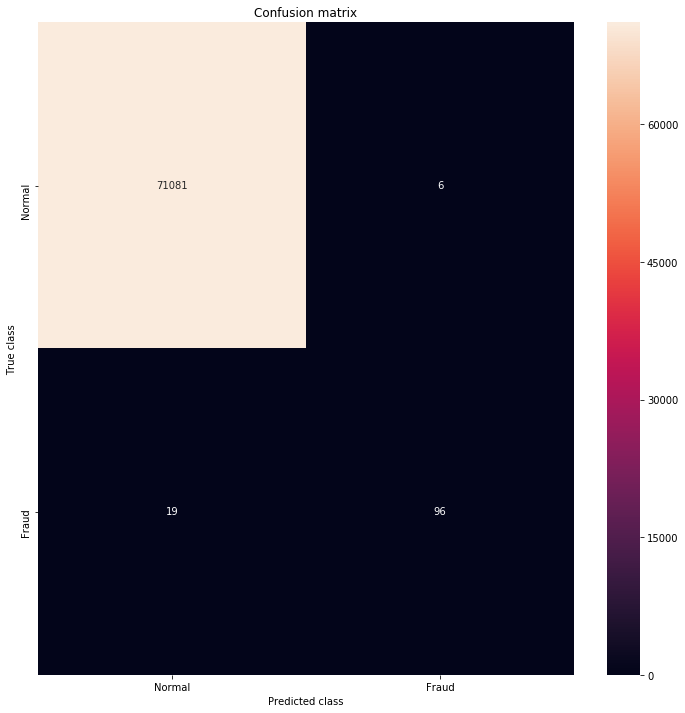

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71087
           1       0.94      0.83      0.88       115

    accuracy                           1.00     71202
   macro avg       0.97      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202



0    71087
1      115
Name: real, dtype: int64 

0    71100
1      102
Name: pred, dtype: int64 



In [43]:
y_pred_os = ftc_rfc.predict(x_test)
ftc_represent(y_test, y_pred_os)

In [45]:
roc_auc_score(y_test, y_pred_os)

0.9173491025387752

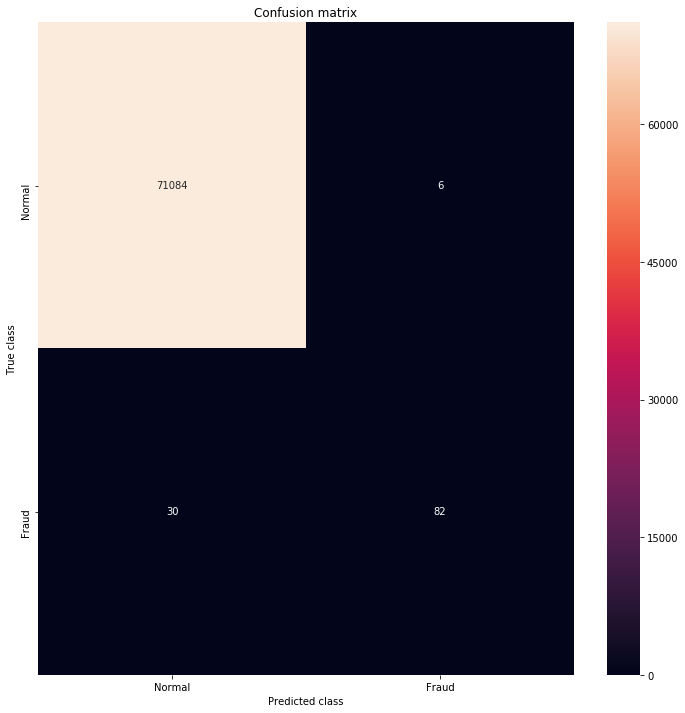

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.93      0.73      0.82       112

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202



0    71090
1      112
Name: real, dtype: int64 

0    71114
1       88
Name: pred, dtype: int64 



In [44]:
y_pred_rfos = ftc_rfc.predict(x_valid)
ftc_represent(y_valid, y_pred_rfos)

In [46]:
roc_auc_score(y_valid, y_pred_rfos)

0.8660292285432952

# Ensambling XGBOOST

In [0]:
def ensambling_model_xgb(x_train, y_train, x_test, y_test):
    
    clf = BalancedBaggingClassifier(base_estimator=xgboost.XGBClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
    clf.fit(x_train, y_train)
    return clf

In [0]:
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ("XBOOST con Método Ensambling")
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    #acc_fraud = accuracy_score(y_test, y_pred)
    #acc_fraud = roc_auc_score(y_valid, y_pred)
    #print("roc_accuracy:", acc_fraud)
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )

In [0]:
xgb_ensambling = ensambling_model_xgb(x_train, y_train, x_test, y_test)

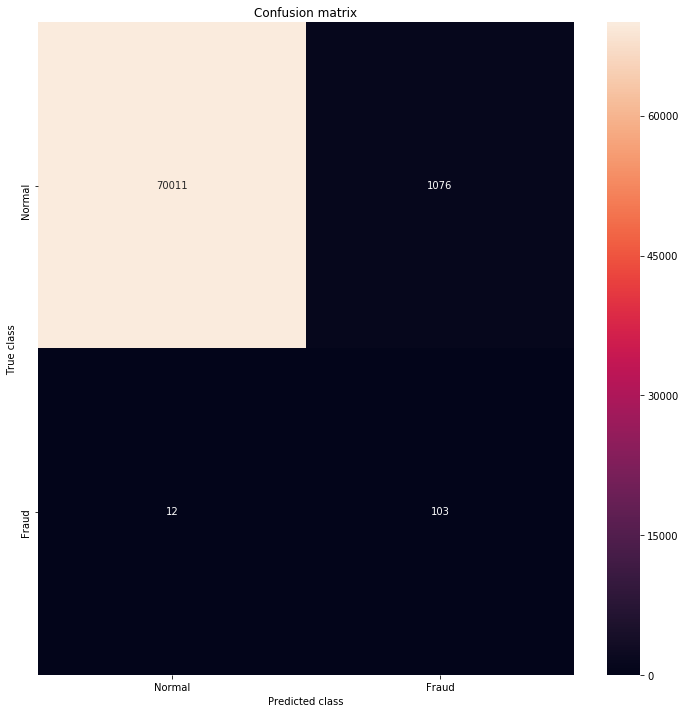

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71087
           1       0.09      0.90      0.16       115

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202



0    71087
1      115
Name: real, dtype: int64 

0    70023
1     1179
Name: pred, dtype: int64 



In [49]:
y_pred_exgb = xgb_ensambling.predict(x_test)
ftc_represent(y_test, y_pred_exgb)

In [50]:
roc_auc_score(y_test, y_pred_exgb)

0.9402578958667304

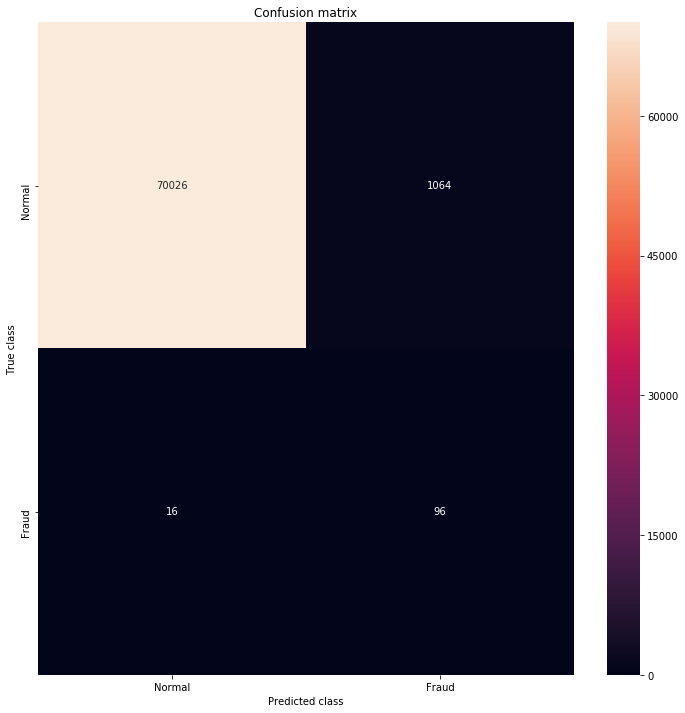

Regresión Logistica con Penalización
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71090
           1       0.08      0.86      0.15       112

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



0    71090
1      112
Name: real, dtype: int64 

0    70042
1     1160
Name: pred, dtype: int64 



In [51]:
y_pred_exgb_valid = xgb_ensambling.predict(x_valid)
ftc_represent(y_valid, y_pred_exgb_valid)

In [52]:
roc_auc_score(y_valid, y_pred_exgb_valid)

0.9210879569157808

# TSNE

In [0]:
mnist = fetch_openml('creditcard')

In [75]:
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(284807, 29) (284807,)


In [76]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (284807, 31)


In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [78]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.995380e-01 5.983879e-05 3.892092e-05]


In [79]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.994439e-01 8.045935e-05 5.972641e-05]


In [80]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 1.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.007446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.429596
[t-SNE] KL divergence after 300 iterations: 2.335202
t-SNE done! Time elapsed:

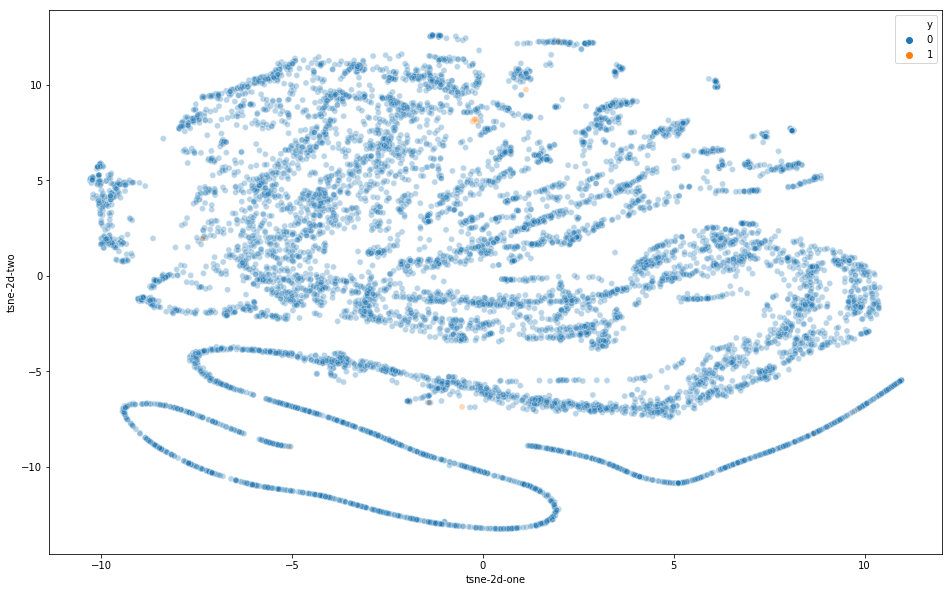

In [90]:
#Now that we have the two resulting dimensions we can again visualise them by creating a scatter plot of the two dimensions and coloring each sample by its respective label.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    #palette=sns.color_palette("hls", 10),
    #palette="Set2",
    data=df_subset,
    legend="full",
    alpha=0.3
)